In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np


┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

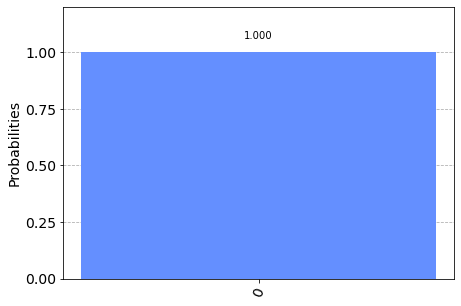

In [2]:
qc = QuantumCircuit(1,1)
# Say person 1, Kartik prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Kartik will now send the qubits to person 2, say Sharanya, who will measure it in one basis, say horizontal 
qc.h(0)
qc.measure(0,0)

# Drawing the circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
q_0: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

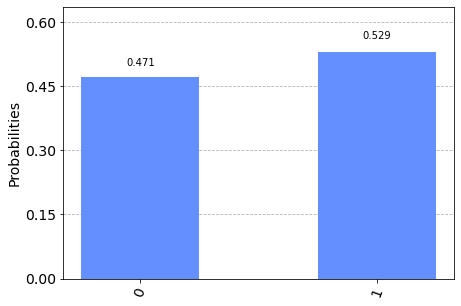

In [3]:
qc = QuantumCircuit(1,1)
# Kartik prepares qubit in state |+>
qc.h(0)
# Kartik is again sending the qubit to Sharanya, but someone else tries to intercept the communication
qc.measure(0, 0)
qc.barrier()
# The third person sees it and passes it on to Sharanya, who measures it like before
qc.h(0)
qc.measure(0,0)

# Drawing the circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

In [4]:
#So as we can see here, now the Qubits that Sharanya has recieved has a 50% chance of being in the state 1, as compared to
#the previous 100% probability. So it is obvious that we wont get the same result and Kartik and Sharanya will know some
#tampering has been done. 

In [6]:
#Trying the actual expt out. 

np.random.seed(seed=0)
n = 100
# Generating a set of random bits
kartik_bits = randint(2, size=n)
print(kartik_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [7]:

# Creating an array to show what qubits are in what states
kartik_bits = randint(2, size=n)
print(kartik_bits)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [8]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [11]:
kartik_bases = randint(2, size=n)
message = encode_message(kartik_bits, kartik_bases)
print('bit = %i' % kartik_bits[0])
print('basis = %i' % kartik_bases[0])

bit = 1
basis = 0


In [38]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [39]:
shar_results = measure_message(message, shar_bases)
message[0].draw()
#The circuit here shows that the zeroeth qubit has had an X gate added in the measurement. 

┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [40]:
print(shar_results)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [41]:
#SOme important functions which are used later: 
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

In [59]:
np.random.seed(seed=0)
n = 100

#THese are just the codes written above written again as it runs in different cells and uses random function. 

kartik_bits = randint(2, size=n)
kartik_bases = randint(2, size=n)
message = encode_message(kartik_bits, kartik_bases)


shar_bases = randint(2, size=n)
shar_results = measure_message(message, shar_bases)

kartik_key = remove_garbage(kartik_bases, shar_bases, kartik_bits)
shar_key = remove_garbage(kartik_bases, shar_bases, shar_results)

# Here we will be selecting a small data from the entire collection to see how different or same the data recieved is. 
sample_size = 15
bit_selection = randint(n, size=sample_size)

shar_sample = sample_bits(shar_key, bit_selection)
print("  Sharanya's sample data = " + str(shar_sample))
kartik_sample = sample_bits(kartik_key, bit_selection)
print("Kartik's sample data = "+ str(kartik_sample))

  Sharanya's sample data = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Kartik's sample data = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [60]:
# As we can see, since no tampering has been done, the data recieved by Sharanya is the same as the data Kartik sent!